<a href="https://colab.research.google.com/github/Udinkosd/PakNur-Bookstore/blob/main/PakNur%20Bookstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANALISIS PENJUALAN DAN PREFERENSI PEMBELIAN PADA BISNIS TOKO BUKUPAK NUR**

#**Import Library**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import cross_val_score

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Toko buku Pak Nur bertujuan untuk memahami lebih dalam preferensi pelanggan, tren pembelian, dan permintaan pasar melalui analisis clustering. Dengan mengidentifikasi kelompok pelanggan yang memiliki perilaku pembelian yang serupa, mereka berharap dapat menyusun strategi pemasaran yang lebih terarah dan menyesuaikan stok barang dengan lebih baik, sehingga meningkatkan kinerja bisnis mereka secara keseluruhan.

##**Assess Situation**

Evaluasi situasi mencakup pemahaman tentang profil pelanggan, seperti demografi dan preferensi pembelian, serta analisis inventaris buku, strategi kompetisi, dan tren pasar yang mempengaruhi toko buku Pak Nur di pasar yang kompetitif.

##**Data Mining Goals**

Tujuan dari analisis clustering adalah untuk mengidentifikasi kelompok pelanggan berdasarkan perilaku pembelian yang serupa. Ini akan memungkinkan toko buku Pak Nur untuk memahami preferensi kelompok pelanggan yang berbeda secara lebih mendalam dan menyesuaikan strategi pemasaran dan stok barang sesuai dengan setiap kelompok.

##**Project Plan**

Rencana proyek akan mencakup langkah-langkah untuk mengumpulkan data pelanggan dan penjualan yang relevan, membersihkan dan memproses data untuk analisis clustering, menerapkan algoritma clustering yang sesuai, mengevaluasi dan menginterpretasi hasil clustering, dan mengimplementasikan wawasan yang diperoleh ke dalam strategi pemasaran dan operasional toko. Dengan mengikuti rencana ini, toko buku Pak Nur dapat meningkatkan pemahaman mereka tentang perilaku pembelian pelanggan mereka dan mengoptimalkan strategi bisnis mereka.

#**DATA UNDERSTANDING**




##**Collect Initial Data**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AbdulahFaiz/pa_datmin/main/DATA%20ASET%20TOKO%20PAK%20NUR.csv', delimiter=';')
df.head()

,JUDUL BUKU,PENULIS/PENGARANG,PENERBIT,TANGGAL/BULAN/TAHUN PEROLEHAN,BARANG,HARGA SATUAN,HARGA TOTAL
0,Karakter Diri di Balik Juz Al Qur'an,H. Ziyad Ul-Haq At-Tubany,Rahma Media Pustaka,3 JANUARI 2021,1,40.0,40.0
1,Selayang Pandang Gunung Lawu (Wisata dan Mitos),Suryo Domas Sri PB.,Mediatama,3 JANUARI 2021,2,33.5,67.0
2,"Petunjuk Mendapatkan Lailatul Qodar ""disertai ...",Dr. Faruq Hamadah,Rahma Media Pustaka,3 JANUARI 2021,1,30.0,30.0
3,Ziarah Makam Walisongo,Hardjana HP,Mediatama,3 JANUARI 2021,1,38.0,38.0
4,Kesehatan di Sekolah,Pung Pribadi,Karya Mandiri Nusantara,3 JANUARI 2021,1,34.5,34.5


##**Describe Data**

####Informasi Dasar

In [ ]:
print("Jumlah baris dataset:", df.shape[0])
print("Jumlah kolom dataset:", df.shape[1])

Jumlah baris dataset: 130
Jumlah kolom dataset: 7


####Informasi Lanjutan

In [ ]:
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   JUDUL BUKU                     130 non-null    object 
 1   PENULIS/PENGARANG              130 non-null    object 
 2   PENERBIT                       130 non-null    object 
 3   TANGGAL/BULAN/TAHUN PEROLEHAN  130 non-null    object 
 4   BARANG                         130 non-null    int64  
 5   HARGA SATUAN                   130 non-null    float64
 6   HARGA TOTAL                    130 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 7.2+ KB


DataFrame ini memiliki 130 entri dan terdiri dari 7 kolom:

1. JUDUL BUKU: Kolom ini berisi nama judul buku nyang telah diperoleh oleh toko buku Pak Nur. Setiap entri dalam kolom ini merupakan string (tipe data: object).

2. PENULIS/PENGARANG: Kolom ini berisi nama penulis atau pengarang dari setiap buku yang tercantum dalam DataFrame. Seperti kolom "JUDUL BUKU", setiap entri dalam kolom ini juga merupakan string (tipe data: object).
3. PENERBIT: Kolom ini berisi nama penerbit dari setiap buku yang tercantum dalam DataFrame. Setiap entri dalam kolom ini merupakan string (tipe data: object).
4. TANGGAL/BULAN/TAHUN PEROLEHAN: Kolom ini mencatat tanggal, bulan, dan tahun ketika buku tersebut diperoleh oleh toko buku Pak Nur. Data dalam kolom ini kemungkinan besar berupa string (tipe data: object) atau dapat dikonversi menjadi tipe data tanggal (datetime) setelah pemrosesan.
5. BARANG: Kolom ini mencatat jumlah barang atau kuantitas buku yang diperoleh oleh toko buku Pak Nur. Setiap entri dalam kolom ini merupakan bilangan bulat (tipe data: int64).
6. HARGA SATUAN: Kolom ini berisi harga satuannya dari setiap buku yang tercantum dalam DataFrame. Harga satuannya dinyatakan dalam format angka desimal (tipe data: float64).
7. HARGA TOTAL: Kolom ini mencatat total harga dari kuantitas barang tertentu yang diperoleh oleh toko buku Pak Nur. Total harga ini dihitung dengan mengalikan jumlah barang (kolom "BARANG") dengan harga satuan (kolom "HARGA SATUAN"). Data dalam kolom ini juga dinyatakan dalam format angka desimal (tipe data: float64).

In [ ]:
# Check if 'HARGA TOTAL' column exists in the DataFrame

if 'HARGA TOTAL ' in df.columns:
    # Print the values in the 'HARGA TOTAL' column
    print(df['HARGA TOTAL'])
else:
    print("Column 'HARGA TOTAL' not found in DataFrame.")
    print(df.columns)


Column 'HARGA TOTAL' not found in DataFrame.
Index(['JUDUL BUKU', 'PENULIS/PENGARANG', 'PENERBIT',
       'TANGGAL/BULAN/TAHUN PEROLEHAN', 'BARANG', 'HARGA SATUAN',
       'HARGA TOTAL'],
      dtype='object')


####Informasi Statistik Deskriptif

In [ ]:
df.describe()

,BARANG,HARGA SATUAN,HARGA TOTAL
count,130.000000,130.000000,130.000000
mean,1.023077,38.461538,39.269231
std,0.150729,15.598223,16.303815
min,1.000000,30.000000,30.000000
25%,1.000000,33.500000,33.500000
50%,1.000000,35.000000,35.000000
75%,1.000000,37.500000,38.000000
max,2.000000,150.000000,150.000000


#####1. barang

- Count: Terdapat 130 entri dalam kolom "BARANG".
- Mean: Rata-rata barang yang dibeli adalah sekitar 1.02 buku per transaksi.
- Standar Deviasi (std): Standar deviasi dari jumlah barang adalah sekitar 0.15, menunjukkan tingkat variasi atau dispersi dari jumlah barang yang dibeli.
- Min: Jumlah minimum barang yang dibeli adalah 1 buku.
- 25%: Kuantil ke-25 (kuartil bawah) adalah 1 buku, menunjukkan bahwa 25% dari transaksi memiliki pembelian 1 buku atau kurang.
- 50%: Median atau kuartil ke-50 adalah 1 buku, menunjukkan bahwa setengah dari transaksi memiliki pembelian 1 buku atau lebih sedikit.
- 75%: Kuartil ke-75 (kuartil atas) adalah 1 buku, menunjukkan bahwa 75% dari transaksi memiliki pembelian 1 buku atau kurang.
- Max: Jumlah maksimum barang yang dibeli dalam satu transaksi adalah 2 buku.

#####2. Harga Satuan

- Count: Terdapat 130 entri dalam kolom "HARGA SATUAN".
- Mean: Rata-rata harga satuan buku adalah sekitar Rp38.461.
- Std: Standar deviasi dari harga satuan buku adalah sekitar Rp15.598.
- Min: Harga satuan minimum adalah Rp30.000.
- 25%: Kuartil ke-25 (kuartil bawah) adalah Rp33.500, menunjukkan bahwa 25% dari harga satuan buku lebih rendah dari atau sama dengan Rp33.500.
- 50%: Median atau kuartil ke-50 adalah Rp35.000, menunjukkan bahwa setengah dari harga satuan buku lebih rendah dari atau sama dengan Rp35.000.
- 75%: Kuartil ke-75 (kuartil atas) adalah Rp37.500, menunjukkan bahwa 75% dari harga satuan buku lebih rendah dari atau sama dengan Rp37.500.
- Max: Harga satuan maksimum adalah Rp150.000.

#####3. harga total

- Count: Terdapat 130 entri dalam kolom "HARGA TOTAL".
- Mean: Rata-rata harga total transaksi adalah sekitar Rp39.269.
- Std: Standar deviasi dari harga total transaksi adalah sekitar Rp16.304.
- Min: Harga total minimum adalah Rp30.000.
- 25%: Kuartil ke-25 (kuartil bawah) adalah Rp33.500, menunjukkan bahwa - 25% dari harga total transaksi lebih rendah dari atau sama dengan Rp33.500.
- 50%: Median atau kuartil ke-50 adalah Rp35.000, menunjukkan bahwa setengah dari harga total transaksi lebih rendah dari atau sama dengan Rp35.000.
- 75%: Kuartil ke-75 (kuartil atas) adalah Rp38.000, menunjukkan bahwa 75% dari harga total transaksi lebih rendah dari atau sama dengan Rp38.000.
- Max: Harga total maksimum adalah Rp150.000.

##**Exploratory Data Analysis**

####korelasi harga satuan dan penerbit

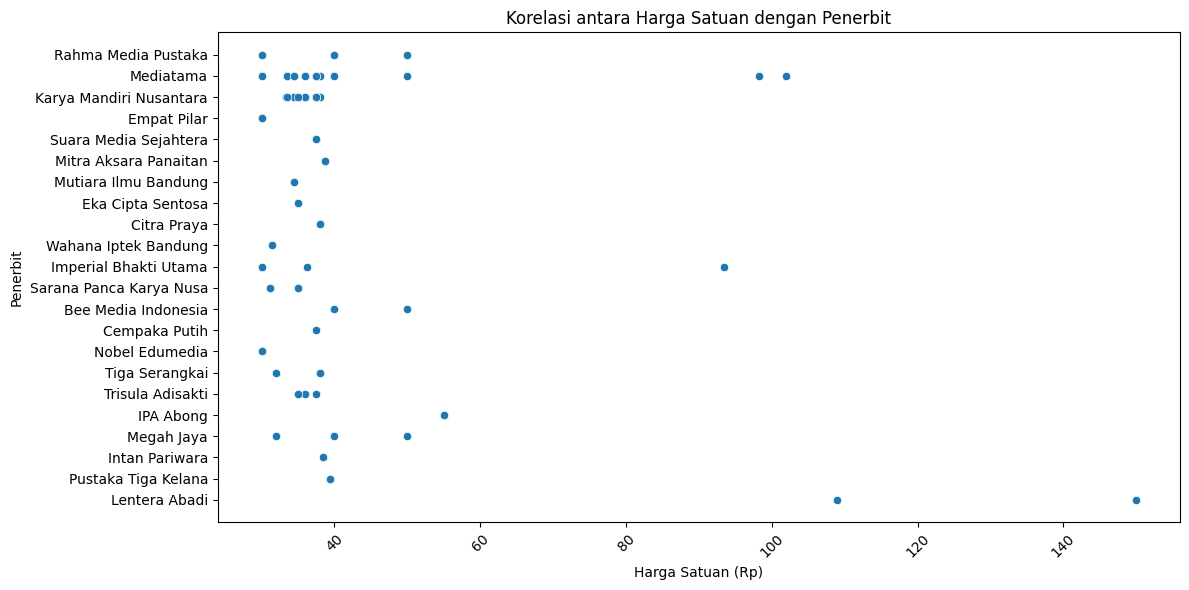

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='HARGA SATUAN', y='PENERBIT')
plt.title('Korelasi antara Harga Satuan dengan Penerbit')
plt.xlabel('Harga Satuan (Rp)')
plt.ylabel('Penerbit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Visualisasi ini menggunakan scatter plot untuk menampilkan hubungan antara harga satuan buku dengan penerbitnya. Pada sumbu x, kita memiliki harga satuan buku (dalam Rupiah), sedangkan pada sumbu y, kita memiliki nama penerbit. Setiap titik pada plot mewakili satu entri dalam dataset, dan posisi titik menunjukkan harga satuan buku dan penerbit yang terkait.

Dengan visualisasi ini, kita dapat melihat pola hubungan antara harga satuan buku dengan penerbitnya. Jika ada korelasi yang kuat antara harga satuan dengan penerbit, kita akan melihat pola tertentu di mana buku dari penerbit tertentu cenderung memiliki harga satuan tertentu yang lebih tinggi atau lebih rendah daripada penerbit lainnya. Ini bisa memberikan wawasan yang berharga tentang strategi penetapan harga dan preferensi pembelian pelanggan di toko buku Pak Nur.

Dari boxplot diatas, terlihat bahwa secara umum, hari Minggu memiliki jumlah tip yang lebih tinggi dibandingkan dengan hari-hari lainnya. Namun, pada hari Sabtu, terdapat banyak nilai anomali yang lebih tinggi dari rata-rata. Hal ini menunjukkan adanya kecenderungan di mana sebagian pelanggan cenderung memberikan jumlah tip yang lebih besar pada hari Sabtu. Pengaruh hari terhadap jumlah tip bisa jadi terkait dengan aktivitas atau kebiasaan makan di luar yang berbeda pada hari-hari tertentu, seperti akhir pekan atau hari libur.

##**Verify Data Quality**

####Missing Values

In [ ]:
miss = df.isnull().sum()

print("nilai kosong pada tiap kolom:")
print(miss)

nilai kosong pada tiap kolom:
JUDUL BUKU                       0
PENULIS/PENGARANG                0
PENERBIT                         0
TANGGAL/BULAN/TAHUN PEROLEHAN    0
BARANG                           0
HARGA SATUAN                     0
HARGA TOTAL                      0
dtype: int64


Dengan menggunakan metode .isnull().sum() pada DataFrame, kita dapat mengecek apakah ada nilai kosong (NaN) pada setiap kolom dalam dataset. Jika hasilnya menunjukkan bahwa jumlah nilai kosong pada setiap kolom adalah 0, maka artinya tidak ada nilai kosong pada kolom tersebut. Dalam konteks ini, hasil dari pengecekan menunjukkan bahwa tidak ada nilai kosong pada tiap kolom dalam dataset. Ini mengindikasikan bahwa dataset tersebut lengkap, tidak ada data yang hilang atau kosong.

####Outliers Values

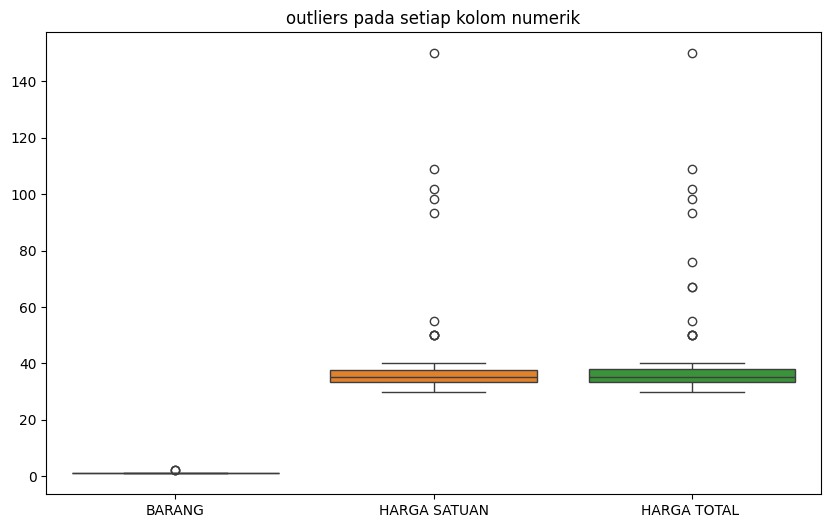

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('outliers pada setiap kolom numerik')
plt.show()


Outliers pada kolom 'BARANG', 'HARGA SATUAN', dan 'HARGA TOTAL' yang menunjuk ke atas mengindikasikan bahwa terdapat nilai yang jauh lebih besar dari sebagian besar data dalam kolom-kolom tersebut. Dalam konteks ini, outliers menunjukkan adanya transaksi atau kejadian yang memiliki nilai yang signifikan secara numerik dan mungkin berbeda secara signifikan dari sebagian besar transaksi atau kejadian lainnya.

Misalnya, dalam kolom 'BARANG', outliers ke atas dapat mengindikasikan adanya transaksi yang melibatkan jumlah barang yang sangat besar atau mungkin mewakili pembelian atau pemesanan dalam jumlah besar yang tidak biasa. Dalam kolom 'HARGA SATUAN', outliers ke atas dapat mengindikasikan bahwa terdapat barang dengan harga satuan yang sangat tinggi, mungkin karena barang tersebut merupakan barang langka atau memiliki nilai khusus.

Sementara dalam kolom 'HARGA TOTAL', outliers ke atas mungkin mengindikasikan bahwa terdapat transaksi atau pembelian dengan total harga yang sangat tinggi, yang dapat disebabkan oleh pembelian barang dalam jumlah besar atau barang dengan harga satuan yang tinggi. Hal ini bisa jadi memperlihatkan adanya pelanggan atau transaksi yang berbeda dari kebanyakan dalam hal nilai transaksi yang dihasilkan.

####Duplicated Values

In [ ]:
df[df.duplicated()]

,JUDUL BUKU,PENULIS/PENGARANG,PENERBIT,TANGGAL/BULAN/TAHUN PEROLEHAN,BARANG,HARGA SATUAN,HARGA TOTAL
73,Ziarah Makam Walisongo,Hardjana HP,Mediatama,3 JANUARI 2021,1,38.0,38.0
74,Kesehatan di Sekolah,Pung Pribadi,Karya Mandiri Nusantara,3 JANUARI 2021,1,34.5,34.5
75,Sumber Air Panas Sari Ater,Choirul Anwar,Mediatama,3 JANUARI 2021,1,37.5,37.5
76,Indonesiaku 5 Provinsi Jawa Timur,Rifan Silvia Eka Putra; Nurul Magfirotunnisa; ...,Karya Mandiri Nusantara,3 JANUARI 2021,1,34.5,34.5
78,Keaajaiban Dunia Baru 6,Diana Tri Hartati,Empat Pilar,3 JANUARI 2021,1,30.0,30.0
79,Keajaiban Dunia Moder Jilid 5,Diana Tri Hartati,Empat Pilar,3 JANUARI 2021,1,30.0,30.0
81,Orang-Orang Belanda di Pintu Darurat,M. Unggul Wibowo,Mediatama,3 JANUARI 2021,1,34.5,34.5
82,Jelajah Museum Jawa Timur dan Bali,Vivied D. Utami,Empat Pilar,3 JANUARI 2021,1,30.0,30.0
83,Sejarah Nenek Moyang Jawa,Radhita Subalidinata dan Bisri M. Djaelani,Suara Media Sejahtera,3 JANUARI 2021,1,37.5,37.5
84,Efek Rumah Kaca,Siti Mukaromah,Mediatama,3 JANUARI 2021,1,38.0,38.0



Dari hasil pengecekan, ditemukan bahwa terdapat duplikat pada baris data diatas, Ini menunjukkan bahwa terdapat baris data yang memiliki nilai yang sama persis dengan baris lain dalam dataset. Dalam konteks ini, baris data ini diidentifikasi sebagai duplikat karena memiliki nilai yang identik dengan baris lainnya

# **DATA PREPARATION**

##**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

In [ ]:
print((df.isna().sum() / len(df)) * 100)

JUDUL BUKU                       0.0
PENULIS/PENGARANG                0.0
PENERBIT                         0.0
TANGGAL/BULAN/TAHUN PEROLEHAN    0.0
BARANG                           0.0
HARGA SATUAN                     0.0
HARGA TOTAL                      0.0
dtype: float64


karena tidak terdapat nilai kosong pada dataset maka tidak perlu dilakukan penanganan nilai kosong

###**Penanganan Duplicated Values**


In [ ]:
# Membaca file CSV dari URL dan menentukan delimiter
df = pd.read_csv('https://raw.githubusercontent.com/AbdulahFaiz/pa_datmin/main/DATA%20ASET%20TOKO%20PAK%20NUR.csv', delimiter=';')

# Menggabungkan data yang terduplikat berdasarkan kolom judul, penulis, penerbit, tanggal dan harga satuan
df_grouped = df.groupby(['JUDUL BUKU', 'PENULIS/PENGARANG', 'PENERBIT', 'TANGGAL/BULAN/TAHUN PEROLEHAN','HARGA SATUAN'], as_index=False).sum()

# # Menyimpan DataFrame yang sudah digabungkan ke dalam file CSV
df_grouped.to_csv('data_clean.csv', index=False)

# print("Data telah disimpan dalam file 'data_clean.csv'.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from googleapiclient.discovery import build
from google.oauth2 import service_account
import pandas as pd

# Load data
df = pd.read_csv('https://raw.githubusercontent.com/AbdulahFaiz/pa_datmin/main/DATA%20ASET%20TOKO%20PAK%20NUR.csv', delimiter=';')

# Clean data
df_grouped = df.groupby(['JUDUL BUKU', 'PENULIS/PENGARANG', 'PENERBIT', 'TANGGAL/BULAN/TAHUN PEROLEHAN','HARGA SATUAN'], as_index=False).sum()

# Save cleaned data to CSV
df_grouped.to_csv('data_clean.csv', index=False)

# Set up Google Drive API credentials
credentials = service_account.Credentials.from_service_account_file(
    'path_to_service_account_file.json',  # Path to your service account JSON file
    scopes=['https://www.googleapis.com/auth/drive'])

# Create Google Drive API service
service = build('drive', 'v3', credentials=credentials)

# Upload file to Google Drive
file_metadata = {'name': 'data_clean.csv'}
media = MediaFileUpload('data_clean.csv', mimetype='text/csv')
file = service.files().create(body=file_metadata, media_body=media, fields='id').execute()

print("File uploaded successfully: %s" % file.get('id'))


#####**Pengecekkan Nilai Duplikat**

In [ ]:
df = pd.read_csv('data_clean.csv')
df[df.duplicated()]

NameError: name 'pd' is not defined

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
HARGA SATUAN,12.50
BARANG,0.00
HARGA TOTAL,1.25


terdapat outliers pada kolom BARANG, HARGA SATUAN, and HARGA TOTAL. karena outliers pada dataset ini valid dan relevan maka outliers tidak perlu dihapus pada dataset ini

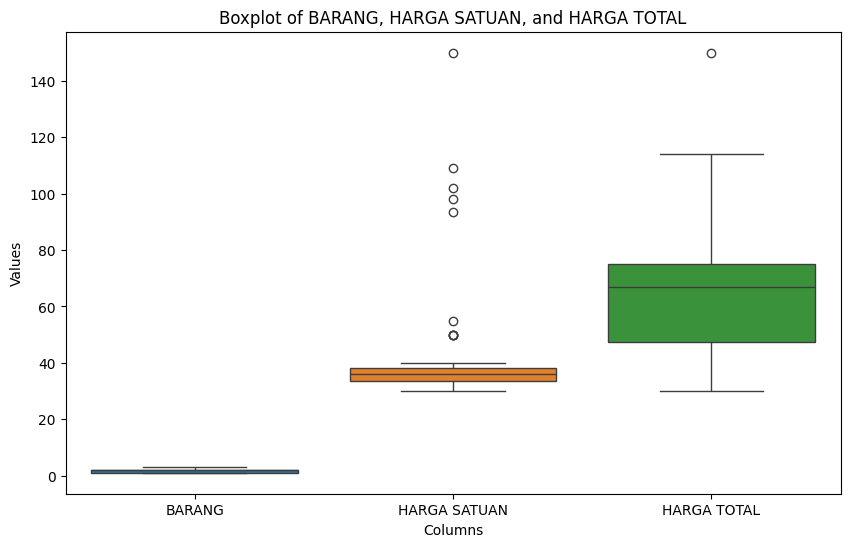

In [ ]:
# Menghapus spasi tambahan dari nama kolom
df.columns = df.columns.str.strip()

# Membuat boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['BARANG', 'HARGA SATUAN', 'HARGA TOTAL']])
plt.title('Boxplot of BARANG, HARGA SATUAN, and HARGA TOTAL')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()


#####**Imputasi Outliers**

melakukan capping dengan menggantikan nilai-nilai outlier yang melebihi batas atas dengan nilai batas atas yang ditentukan (cap) untuk setiap kolom yang terdapat outliers

In [ ]:
def cap_outliers(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    cap = Q3 + 1.5 * IQR

    df[column] = df[column].apply(lambda x: cap if x > cap else x)
    return df

columns_to_cap = ['BARANG', 'HARGA SATUAN', 'HARGA TOTAL']
for column in columns_to_cap:
    df = cap_outliers(df, column)

#####**Pengecekkan Ulang**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
HARGA SATUAN,0.0
BARANG,0.0
HARGA TOTAL,0.0


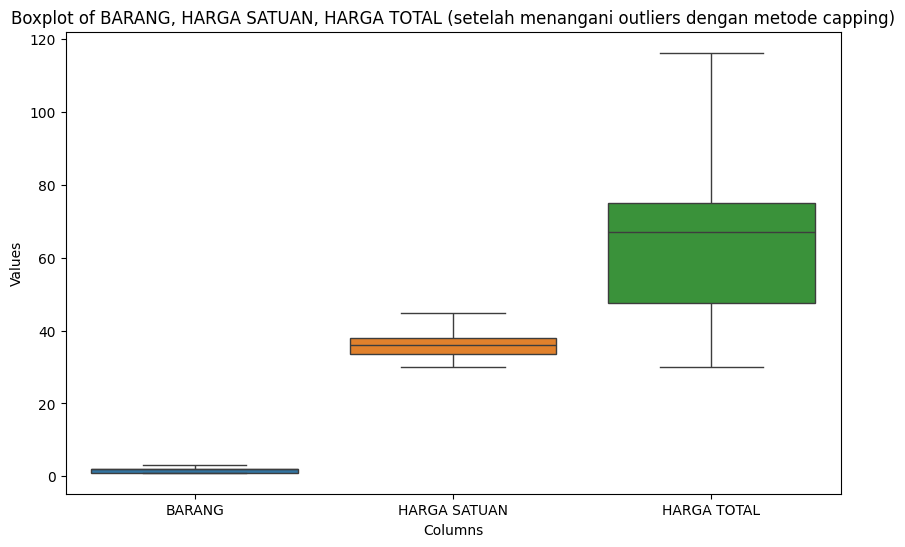

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['BARANG', 'HARGA SATUAN', 'HARGA TOTAL']])
plt.title('Boxplot of BARANG, HARGA SATUAN, HARGA TOTAL (setelah menangani outliers dengan metode capping)')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

visualisasi boxplot baru yang menunjukkan distribusi data setelah penanganan outliers menggunakan metode capping.

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [ ]:
def categorize_price(price):
    if price < 33.5:
        return 'rendah'
    elif 33.5 <= price < 37.5:
        return 'sedang'
    else:
        return 'tinggi'

df['KATEGORI HARGA'] = df['HARGA SATUAN'].apply(categorize_price)

In [ ]:
df

,JUDUL BUKU,PENULIS/PENGARANG,PENERBIT,TANGGAL/BULAN/TAHUN PEROLEHAN,HARGA SATUAN,BARANG,HARGA TOTAL,KATEGORI HARGA
0,Adab mulia terhadab guru,Nuha Rifqia,Karya Mandiri Nusantara,3 JANUARI 2021,34.50,2,69.0,sedang
1,Aneka Cabang Olah Raga,Aminudin,Mutiara Ilmu Bandung,3 JANUARI 2021,34.50,2,69.0,sedang
2,Anugerah Gunung Merapi,Wiwik Sulistyorini,Mediatama,3 JANUARI 2021,33.50,2,67.0,sedang
3,Ayo Berlatih Menulis Surat,Titiek Maryuni,Mediatama,3 JANUARI 2021,37.50,2,75.0,tinggi
4,"Ayo, Bangun untuk Salat Subuh",Dewi Atuti,Imperial Bhakti Utama,3 JANUARI 2021,30.00,2,60.0,rendah
...,...,...,...,...,...,...,...,...
75,Terbang ke Angkasa Bersama Observatorium Bosscha,Keen Achroni,Mediatama,3 JANUARI 2021,30.00,2,60.0,rendah
76,Waspada Banjir dan Tanah Longsor 2,"Adcharina Pratiwi, Suparti",Karya Mandiri Nusantara,3 JANUARI 2021,37.50,2,75.0,tinggi
77,Zamrud Khatulistiwa Indonesia,Nursanti Riandini,Bee Media Indonesia,3 JANUARI 2021,40.00,1,40.0,tinggi
78,Zamrud Khatulistiwa Indonesia,Nursanti Riandini,Bee Media Indonesia,3 JANUARI 2021,44.75,1,50.0,tinggi


menambahkan fitur baru 'kategori harga' yang menunjukkan apakah harga tersebut masuk dalam kategori 'tinggi', 'sedang' atau 'rendah'

###**Pengecekkan Hasil**

In [ ]:
df.head()

,JUDUL BUKU,PENULIS/PENGARANG,PENERBIT,TANGGAL/BULAN/TAHUN PEROLEHAN,HARGA SATUAN,BARANG,HARGA TOTAL,KATEGORI HARGA
0,Adab mulia terhadab guru,Nuha Rifqia,Karya Mandiri Nusantara,3 JANUARI 2021,34.5,2,69.0,sedang
1,Aneka Cabang Olah Raga,Aminudin,Mutiara Ilmu Bandung,3 JANUARI 2021,34.5,2,69.0,sedang
2,Anugerah Gunung Merapi,Wiwik Sulistyorini,Mediatama,3 JANUARI 2021,33.5,2,67.0,sedang
3,Ayo Berlatih Menulis Surat,Titiek Maryuni,Mediatama,3 JANUARI 2021,37.5,2,75.0,tinggi
4,"Ayo, Bangun untuk Salat Subuh",Dewi Atuti,Imperial Bhakti Utama,3 JANUARI 2021,30.0,2,60.0,rendah


#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [ ]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [ ]:
df = df.drop(['TANGGAL/BULAN/TAHUN PEROLEHAN', 'JUDUL BUKU', 'PENULIS/PENGARANG', 'PENERBIT'], axis=1)

menghapus fitur "TANGGAL/BULAN/TAHUN PEROLEHAN" karena tidak memiliki hubungan yang signifikan dengan target variabel atau tidak memberikan informasi yang relevan dalam analisis yang sedang dilakukan, maka fitur tersebut dapat dianggap tidak informatif.

###**Pengecekkan Hasil**

In [ ]:
df.head()

,HARGA SATUAN,BARANG,HARGA TOTAL,KATEGORI HARGA
0,34.5,2,69.0,sedang
1,34.5,2,69.0,sedang
2,33.5,2,67.0,sedang
3,37.5,2,75.0,tinggi
4,30.0,2,60.0,rendah


hasil dataframe setelah TANGGAL/BULAN/TAHUN PEROLEHAN telah dihapus pada dataset

#**Data Transformation**

###**Mapping**

In [ ]:
df['KATEGORI HARGA'] = df['KATEGORI HARGA'].map({'rendah':1,'sedang':2, 'tinggi':3})

kolom 'kategori harga' yang sekarang berisi nilai numerik (1 untuk rendah, 2 untuk sedang dan 3 untuk tinggi) yang dapat digunakan dalam analisis atau pemodelan data yang memerlukan variabel kategorikal yang diubah menjadi bentuk numerik.

###**Pengecekkan Hasil**

In [ ]:
df.head()

,HARGA SATUAN,BARANG,HARGA TOTAL,KATEGORI HARGA
0,34.5,2,69.0,2
1,34.5,2,69.0,2
2,33.5,2,67.0,2
3,37.5,2,75.0,3
4,30.0,2,60.0,1


Ini hasilnya setelah kolom 'kategori harga' yang sebelumnya berisi nilai string sekarang berisi nilai numerik (1 untuk rendah, 2 untuk sedang dan 3 untuk tinggi)

In [ ]:
df.to_csv('data_clean.csv', index=False)

# **Modelling**

## **Select Modelling Techniques**

### **K-Means**

In [ ]:
from sklearn.cluster import KMeans

### **Hierarchical Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

## **Modelling Associate**

### **Pre-Processing**

#### **Standarisasi Data**

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline_kmeans = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(random_state=42))
])

In [ ]:
df_clean = df.dropna(subset=['HARGA TOTAL', 'HARGA SATUAN', 'BARANG'])

In [ ]:
features = ['HARGA TOTAL', 'HARGA SATUAN', 'BARANG']

In [ ]:
x = df_clean[features]

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#### **Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

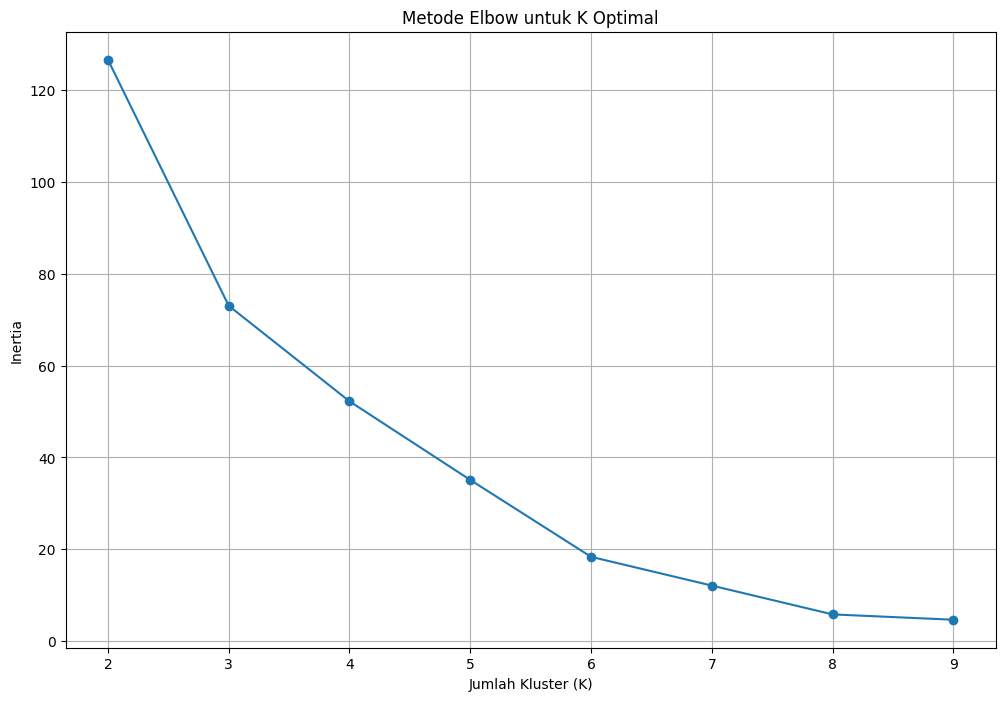

In [ ]:
inertia_values = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Jumlah Kluster (K)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk K Optimal')
plt.grid(True)

### **Build Model**

#### **K-Means**

In [ ]:
pipeline_kmeans = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=4, random_state=42))
])

In [ ]:
pipeline_kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

#### **Hierarchical Clustering**

In [ ]:
pipeline_hc = Pipeline([
    ('scaler', StandardScaler()),
    ('hc', AgglomerativeClustering(n_clusters=4))
])

In [ ]:
pipeline_hc.fit(x_scaled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('hc', AgglomerativeClustering(n_clusters=4))])

### **Begins and Compare Clusters**

In [ ]:
df_clean['cluster_kmeans'] = pipeline_kmeans.named_steps['kmeans'].labels_
df_clean['cluster_hc'] = pipeline_hc.named_steps['hc'].labels_

In [ ]:
df_clean

,HARGA SATUAN,BARANG,HARGA TOTAL,KATEGORI HARGA,cluster_kmeans,cluster_hc
0,34.50,2,69.0,2,2,3
1,34.50,2,69.0,2,2,3
2,33.50,2,67.0,2,1,3
3,37.50,2,75.0,3,2,1
4,30.00,2,60.0,1,1,3
...,...,...,...,...,...,...
75,30.00,2,60.0,1,1,3
76,37.50,2,75.0,3,2,1
77,40.00,1,40.0,3,0,2
78,44.75,1,50.0,3,3,0


## **Visualisasi**

### **Visulialisasi Persebaran Harga satuan dengan kategori harga Dalam Setiap Cluster.**

#### **K-Means**

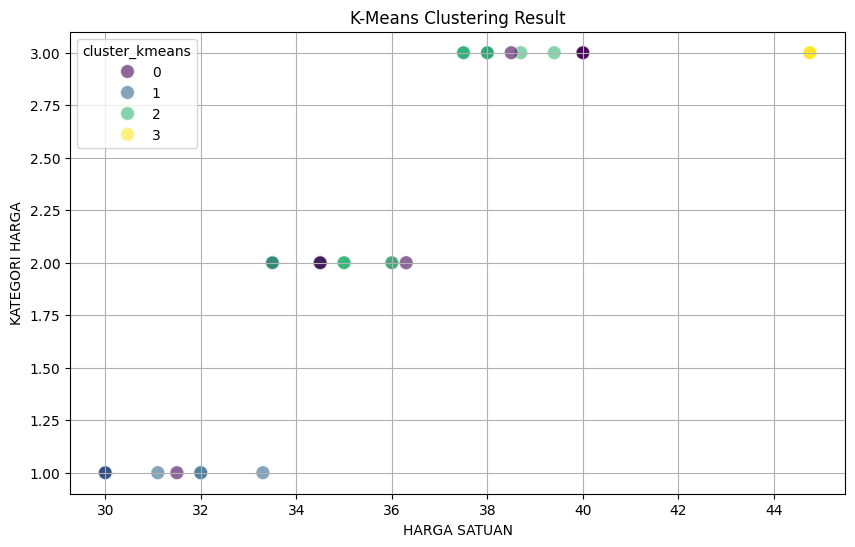

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='HARGA SATUAN', y='KATEGORI HARGA', hue='cluster_kmeans', palette='viridis', s=100, alpha=0.6)
plt.grid(True)
plt.title('K-Means Clustering Result')
plt.show()

#### **Hierarchical Clustering**

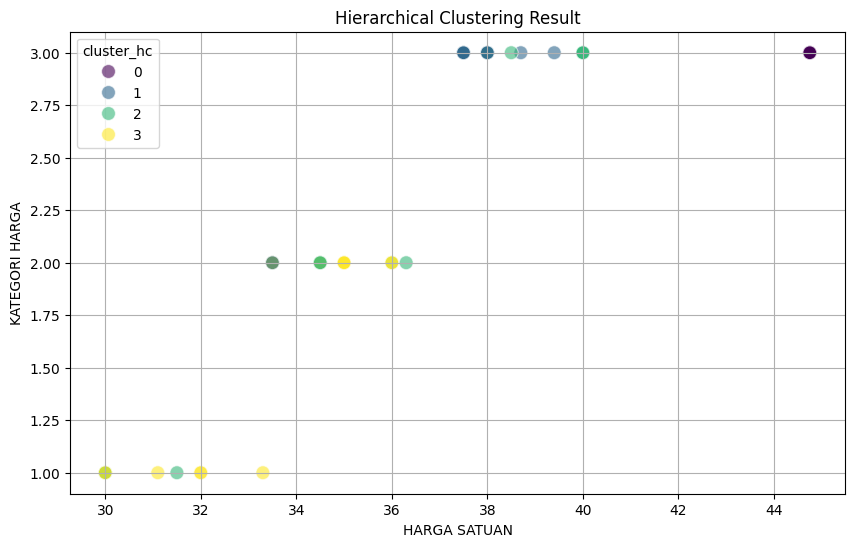

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='HARGA SATUAN', y='KATEGORI HARGA', hue='cluster_hc', palette='viridis', s=100, alpha=0.6)
plt.grid(True)
plt.title('Hierarchical Clustering Result')
plt.show()

# **EVALUATION**

## **Evaluation Results**

### **Clustering**

In [ ]:
kmeans_labels = pipeline_kmeans.named_steps['kmeans'].labels_
hc_labels = pipeline_hc.fit_predict(x_scaled)

silhouette_avg_kmeans = silhouette_score(x_scaled, kmeans_labels)
ch_score_kmeans = calinski_harabasz_score(x_scaled, kmeans_labels)
db_score_kmeans = davies_bouldin_score(x_scaled, kmeans_labels)

silhouette_avg_hc = silhouette_score(x_scaled, hc_labels)
ch_score_hc = calinski_harabasz_score(x_scaled, hc_labels)
db_score_hc = davies_bouldin_score(x_scaled, hc_labels)

metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Agglomerative Clustering Score': scores_hc})

df_scores = df_scores.set_index('')

df_scores = df_scores.T

display(df_scores)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.535483,91.086917,0.680644
Agglomerative Clustering Score,0.553456,89.605519,0.797161


## **Review Process**

### **Cross Validation**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

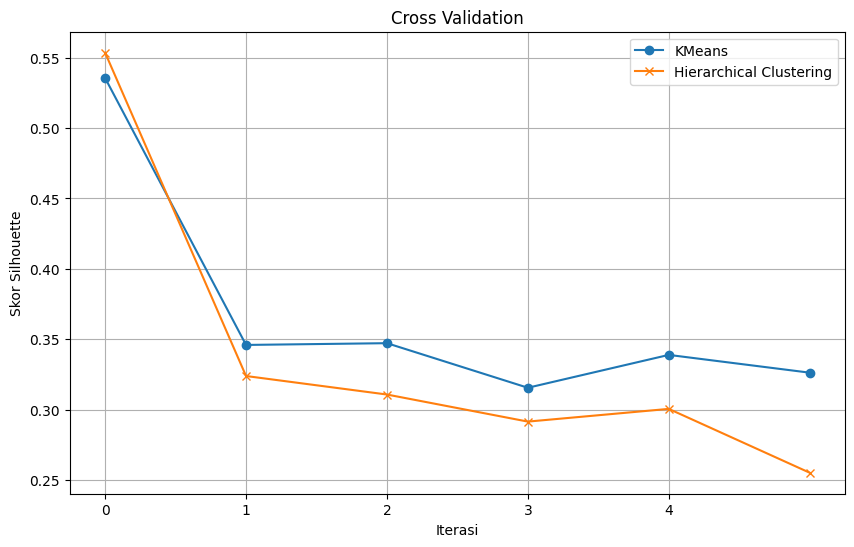

In [ ]:
from sklearn.utils import resample

iterasi = 5
skor_silhouette_kmeans = [silhouette_avg_kmeans]
skor_silhouette_hc = [silhouette_avg_hc]

data = np.random.rand(100, 3)

for i in range(iterasi):
  data_sample = resample(data, random_state=i)
  scaler = StandardScaler()
  data_sample_scaled = scaler.fit_transform(data_sample)

  kmeans = KMeans(n_clusters=4, random_state=42)
  kmeans.fit(data_sample_scaled)
  skor_silhouette_kmeans.append(silhouette_score(data_sample_scaled, kmeans.labels_))

  hc = AgglomerativeClustering(n_clusters=4)
  cluster_labels_hc = hc.fit_predict(data_sample_scaled)
  skor_silhouette_hc.append(silhouette_score(data_sample_scaled, cluster_labels_hc))

plt.figure(figsize=(10, 6))
plt.plot(skor_silhouette_kmeans, marker='o', label='KMeans')
plt.plot(skor_silhouette_hc, marker='x', label='Hierarchical Clustering')
plt.title('Cross Validation')
plt.xlabel('Iterasi')
plt.ylabel('Skor Silhouette')
plt.legend()
plt.grid(True)
plt.xticks(range(iterasi))
plt.show()

### **Tuning Hyperparameter**

#### **K-Means**

In [ ]:
param_grid = {
    'n_clusters': [3, 4, 5, 6],
    'init_method': ['k-means++', 'random'],
    'algo_type': ['lloyd', 'elkan']
}

best_score = -1
best_params = None

for n_clusters in param_grid['n_clusters']:
    for init_method in param_grid['init_method']:
        for algo_type in param_grid['algo_type']:
            kmeans = KMeans(n_clusters=n_clusters, init=init_method, algorithm=algo_type, n_init=10, random_state=42)
            labels = kmeans.fit_predict(x_scaled)
            silhouette_avg = silhouette_score(x_scaled, labels)
            print("Skor Silhouette:", silhouette_avg, "dengan n_clusters =", n_clusters, ", init_method =", init_method, ", algo_type =", algo_type)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'n_clusters': n_clusters, 'init_method': init_method, 'algo_type': algo_type}

print("\nKombinasi terbaik:")
print(best_params)
print("Skor Silhouette terbaik:", best_score)

Skor Silhouette: 0.6169200646738213 dengan n_clusters = 3 , init_method = k-means++ , algo_type = lloyd
Skor Silhouette: 0.6169200646738213 dengan n_clusters = 3 , init_method = k-means++ , algo_type = elkan
Skor Silhouette: 0.6169200646738213 dengan n_clusters = 3 , init_method = random , algo_type = lloyd
Skor Silhouette: 0.6169200646738213 dengan n_clusters = 3 , init_method = random , algo_type = elkan
Skor Silhouette: 0.5354826550769529 dengan n_clusters = 4 , init_method = k-means++ , algo_type = lloyd
Skor Silhouette: 0.5354826550769529 dengan n_clusters = 4 , init_method = k-means++ , algo_type = elkan
Skor Silhouette: 0.5542921103781275 dengan n_clusters = 4 , init_method = random , algo_type = lloyd
Skor Silhouette: 0.5542921103781275 dengan n_clusters = 4 , init_method = random , algo_type = elkan
Skor Silhouette: 0.5897093981761979 dengan n_clusters = 5 , init_method = k-means++ , algo_type = lloyd
Skor Silhouette: 0.5897093981761979 dengan n_clusters = 5 , init_method = k-

#### **Hierarchical Clustering**

In [ ]:
param_grid = {
    'linkage': ['complete', 'average', 'single'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

best_score = -1
best_params = None

for metric in param_grid['metric']:
  for linkage in param_grid['linkage']:
    hierarchical_clustering = AgglomerativeClustering(n_clusters=5, metric= metric, linkage= linkage)
    labels = hierarchical_clustering.fit_predict(x_scaled)
    silhouette_avg = silhouette_score(x_scaled, labels)
    print("Silhouette Score:", silhouette_avg, "dengan kombinasi metric =",metric, ",linkage =",linkage)
    if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'metric': metric, 'linkage': linkage}

hierarchical_clustering = AgglomerativeClustering(n_clusters=5, metric= 'euclidean', linkage= 'ward')
labels = hierarchical_clustering.fit_predict(x_scaled)
silhouette_avg = silhouette_score(x_scaled, labels)
print("\nKombinasi terbaik:")
print(best_params)
print("Silhouette Score terbaik:", best_score)

Silhouette Score: 0.6114337327648565 dengan kombinasi metric = euclidean ,linkage = complete
Silhouette Score: 0.672902623612927 dengan kombinasi metric = euclidean ,linkage = average
Silhouette Score: 0.6373452537192911 dengan kombinasi metric = euclidean ,linkage = single
Silhouette Score: 0.6114337327648565 dengan kombinasi metric = manhattan ,linkage = complete
Silhouette Score: 0.672902623612927 dengan kombinasi metric = manhattan ,linkage = average
Silhouette Score: 0.6373452537192911 dengan kombinasi metric = manhattan ,linkage = single
Silhouette Score: 0.5108713245980779 dengan kombinasi metric = cosine ,linkage = complete
Silhouette Score: 0.5664289001133029 dengan kombinasi metric = cosine ,linkage = average
Silhouette Score: 0.5664289001133029 dengan kombinasi metric = cosine ,linkage = single

Kombinasi terbaik:
{'metric': 'euclidean', 'linkage': 'average'}
Silhouette Score terbaik: 0.672902623612927


## **Determine Next Steps**